In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# options
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

In [3]:
# data
train = pd.read_csv("../input/playground-series-s3e10/train.csv")
test = pd.read_csv("../input/playground-series-s3e10/test.csv")
submission = pd.read_csv("../input/playground-series-s3e10/sample_submission.csv")

In [4]:
train.head()

id  Mean_Integrated         SD        EK  Skewness  Mean_DMSNR_Curve  \
0   0       133.171875  59.716081  0.043133 -0.703383         54.917224   
1   1        87.093750  36.257973  0.435469  2.266057          3.417224   
2   2       112.640625  39.818393  0.379639  0.922306          2.730769   
3   3       120.679688  45.918448 -0.098490  0.011775          2.696488   
4   4       134.070312  57.720107 -0.107772 -0.573335          1.107860   

   SD_DMSNR_Curve  EK_DMSNR_Curve  Skewness_DMSNR_Curve  Class  
0       70.084438        0.749798             -0.649512      0  
1       21.865069        7.039330             52.686251      0  
2       15.689690        8.193471             85.649785      0  
3       20.954662        8.183874             70.332899      0  
4       11.255051       16.107748            308.753765      0

In [5]:
train.shape

(117564, 10)

In [6]:
test.shape

(78377, 9)

In [7]:
(test.shape[0]/train.shape[0])*100

66.66751726719063

In [8]:
train.describe()

id  Mean_Integrated             SD             EK  \
count  117564.000000    117564.000000  117564.000000  117564.000000   
mean    58781.500000       111.248300      46.713535       0.503498   
std     33937.947861        24.906474       6.102941       1.127093   
min         0.000000         6.054688      24.783273      -1.730782   
25%     29390.750000       104.546875      43.443390       0.049761   
50%     58781.500000       116.664062      47.478932       0.186498   
75%     88172.250000       126.296875      50.862718       0.395620   
max    117563.000000       189.367188      93.602933       7.879628   

            Skewness  Mean_DMSNR_Curve  SD_DMSNR_Curve  EK_DMSNR_Curve  \
count  117564.000000     117564.000000   117564.000000   117564.000000   
mean        1.886385         11.962921       26.190678        8.037488   
std         6.515466         26.719946       20.041937        3.840980   
min        -1.791886          0.213211        7.370432       -2.597872   
25%        -0.188956          2.090301       14.955405        6.742911   
50%         0.091720          2.808528       18.164924        8.442883   
75%         0.691613          4.122910       24.732218       10.003237   
max        65.385974        217.371238      109.890785       34.539844   

       Skewness_DMSNR_Curve          Class  
count         117564.000000  117564.000000  
mean              93.881076       0.093285  
std               79.962110       0.290833  
min               -1.976976       0.000000  
25%               49.409136       0.000000  
50%               83.421375       0.000000  
75%              122.093290       0.000000  
max             1191.000837       1.000000

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117564 entries, 0 to 117563
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    117564 non-null  int64  
 1   Mean_Integrated       117564 non-null  float64
 2   SD                    117564 non-null  float64
 3   EK                    117564 non-null  float64
 4   Skewness              117564 non-null  float64
 5   Mean_DMSNR_Curve      117564 non-null  float64
 6   SD_DMSNR_Curve        117564 non-null  float64
 7   EK_DMSNR_Curve        117564 non-null  float64
 8   Skewness_DMSNR_Curve  117564 non-null  float64
 9   Class                 117564 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 9.0 MB


In [10]:
train.columns

Index(['id', 'Mean_Integrated', 'SD', 'EK', 'Skewness', 'Mean_DMSNR_Curve',
       'SD_DMSNR_Curve', 'EK_DMSNR_Curve', 'Skewness_DMSNR_Curve', 'Class'],
      dtype='object')

In [11]:
features = ['Mean_Integrated', 'SD', 'EK', 'Skewness', 'Mean_DMSNR_Curve',
       'SD_DMSNR_Curve', 'EK_DMSNR_Curve', 'Skewness_DMSNR_Curve']
target = train['Class']

In [12]:
target.value_counts()

0    106597
1     10967
Name: Class, dtype: int64

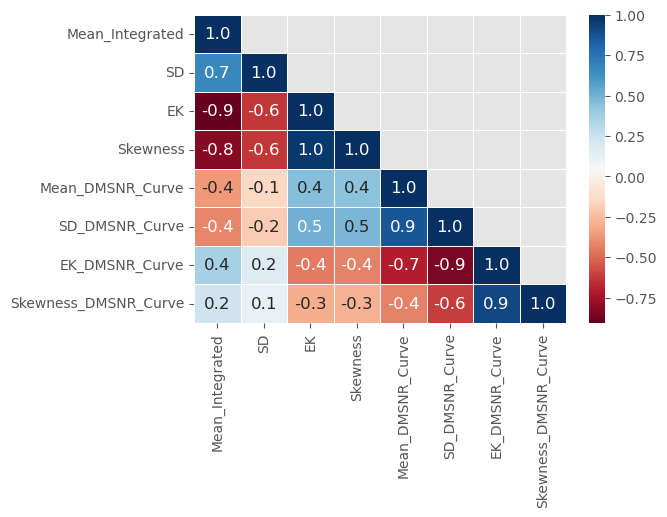

In [13]:
plt.rcParams["figure.figsize"] = (6, 4)

corr = train[features].corr(method='pearson')

triu = np.triu(corr)
np.fill_diagonal(triu, False)

sns.heatmap(corr, annot=True, fmt='.1f',annot_kws={"size":12}, linewidth=.6, mask=triu, cmap='RdBu');

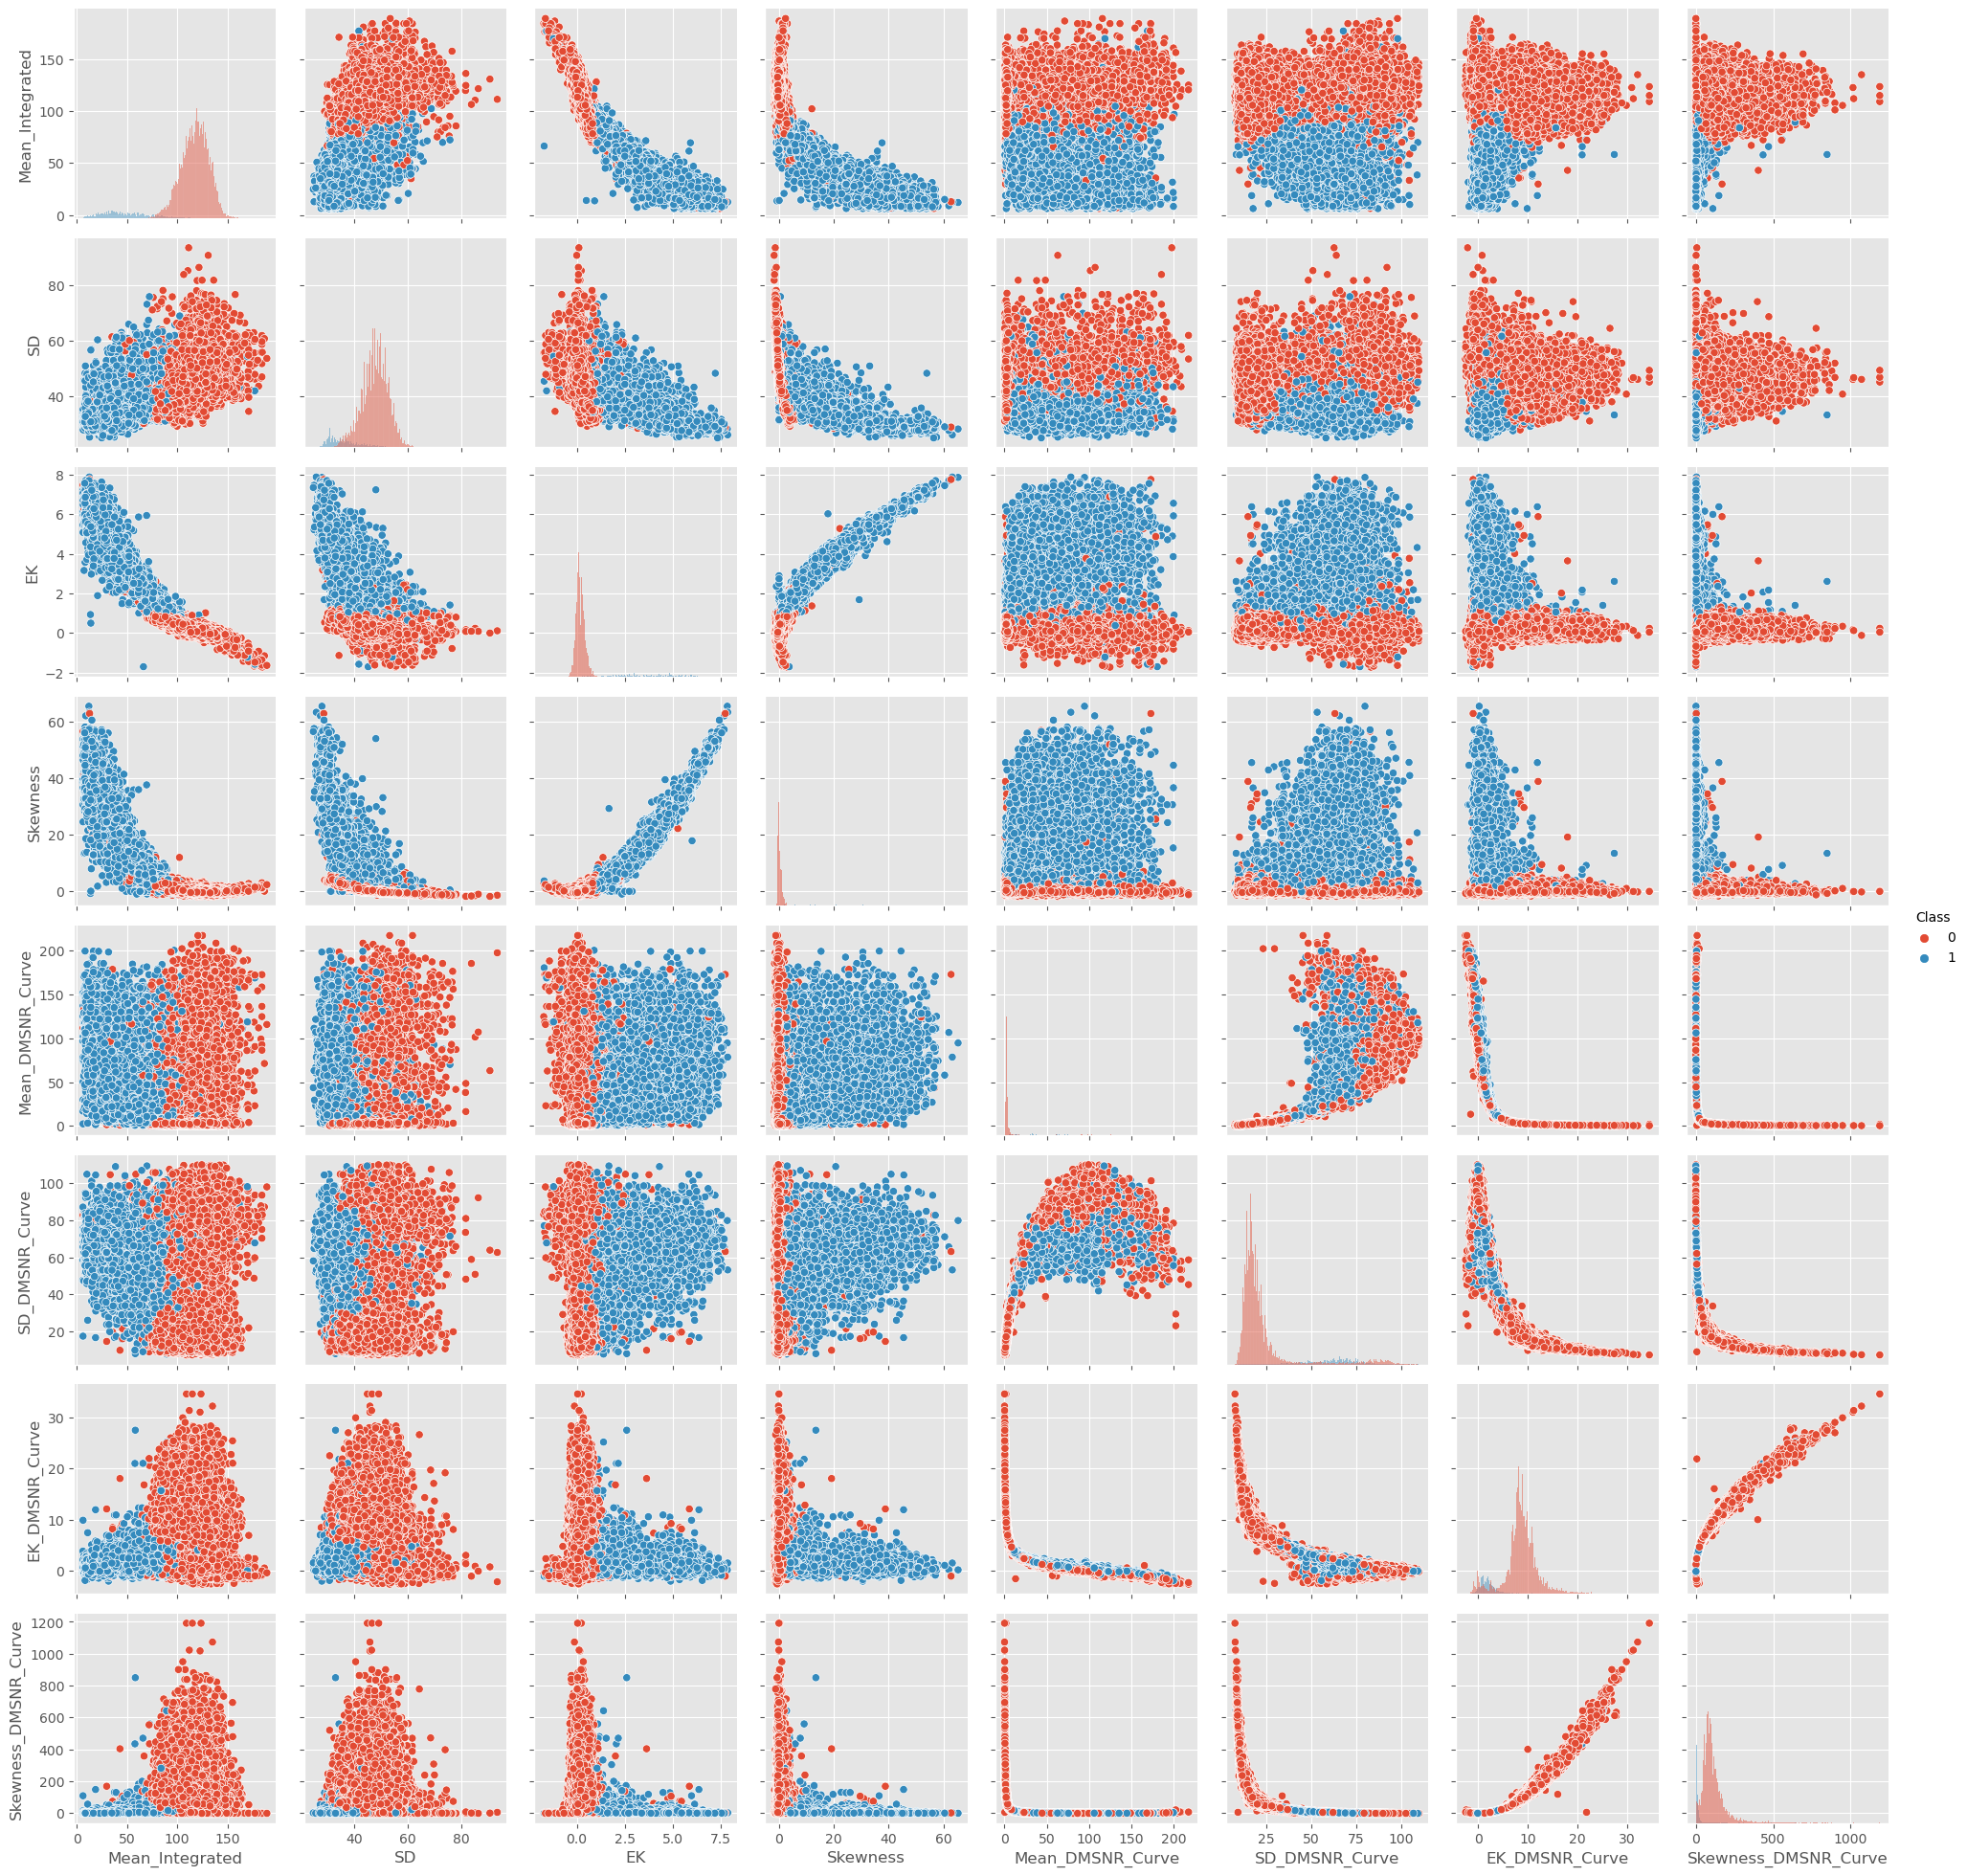

In [14]:
g = sns.PairGrid(train[['Mean_Integrated', 'SD', 'EK', 'Skewness', 'Mean_DMSNR_Curve',
       'SD_DMSNR_Curve', 'EK_DMSNR_Curve', 'Skewness_DMSNR_Curve', 'Class']], hue='Class')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

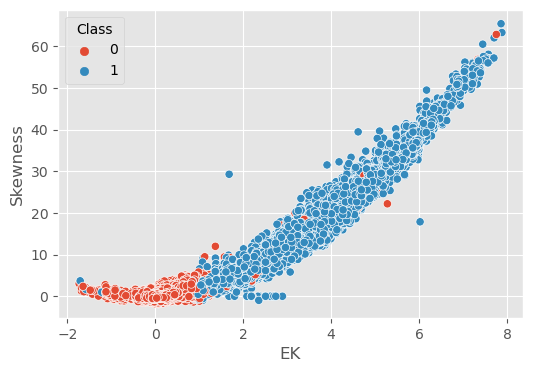

In [15]:
sns.scatterplot(data=train, x='EK', y='Skewness', hue='Class');

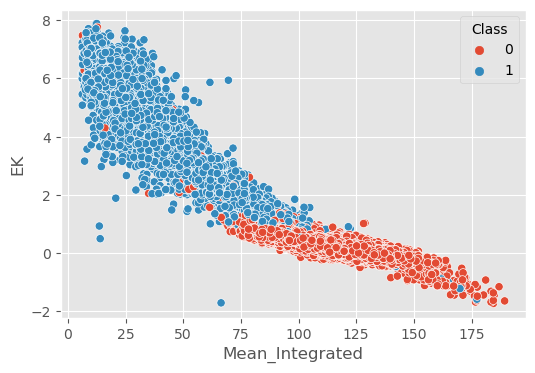

In [16]:
sns.scatterplot(data=train, x='Mean_Integrated', y='EK', hue='Class');

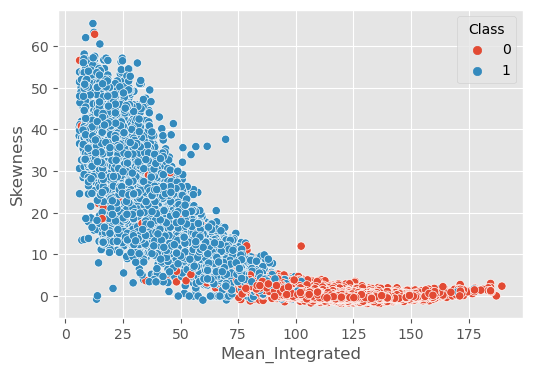

In [17]:
sns.scatterplot(data=train, x='Mean_Integrated', y='Skewness', hue='Class');

In [18]:
test_size = 0.20

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train[features], target, test_size=test_size, stratify=target, random_state=17)
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)

(94051, 8)
(94051,)
(23513, 8)
(23513,)


(None, None)

In [19]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=17)

count = 1
#we use split method that will generate indices to split data into train and test sets

for train_index, test_index in skf.split(X_train, y_train):
    print(f'Fold:{count}, Train set: {len(train_index)},Test set:{len(test_index)}')
    count+=1

Fold:1, Train set: 84645,Test set:9406
Fold:2, Train set: 84646,Test set:9405
Fold:3, Train set: 84646,Test set:9405
Fold:4, Train set: 84646,Test set:9405
Fold:5, Train set: 84646,Test set:9405
Fold:6, Train set: 84646,Test set:9405
Fold:7, Train set: 84646,Test set:9405
Fold:8, Train set: 84646,Test set:9405
Fold:9, Train set: 84646,Test set:9405
Fold:10, Train set: 84646,Test set:9405


In [20]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

In [21]:
score = cross_val_score(RandomForestClassifier(random_state=17), 
                        X_train, y_train, cv=skf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.4f}".format(score.mean())}')

Scores for each fold are: [0.99000638 0.99021797 0.99170654 0.99096225 0.99085593 0.99213184
 0.99106858 0.99170654 0.99043062 0.99021797]
Average score: 0.9909


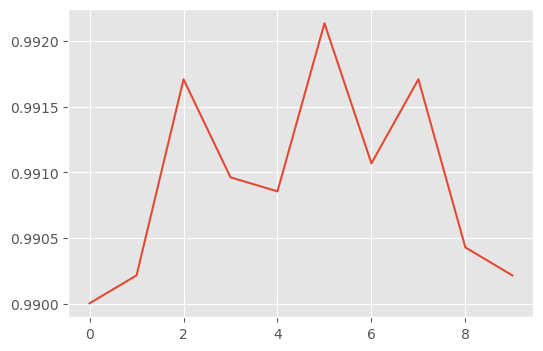

In [22]:
sns.lineplot(score);

In [23]:
score = cross_val_score(LGBMClassifier(random_state=17), 
                        X_train, y_train, cv=skf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.4f}".format(score.mean())}')

Scores for each fold are: [0.98936849 0.99011164 0.99160021 0.99149389 0.99138756 0.99096225
 0.9903243  0.99170654 0.99011164 0.9891547 ]
Average score: 0.9906


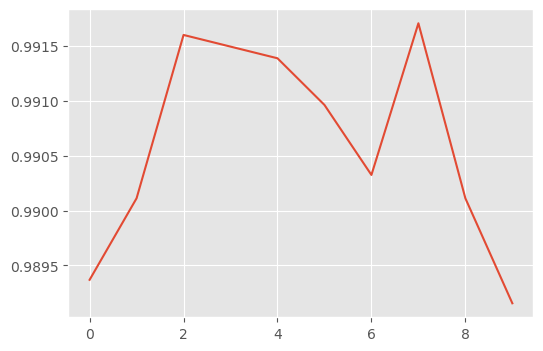

In [24]:
sns.lineplot(score);

In [25]:
score = cross_val_score(RidgeClassifier(random_state=17), 
                        X_train, y_train, cv=skf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.4f}".format(score.mean())}')

Scores for each fold are: [0.98511588 0.984689   0.984689   0.98415736 0.98553961 0.98692185
 0.98415736 0.9851143  0.9830941  0.98522063]
Average score: 0.9849


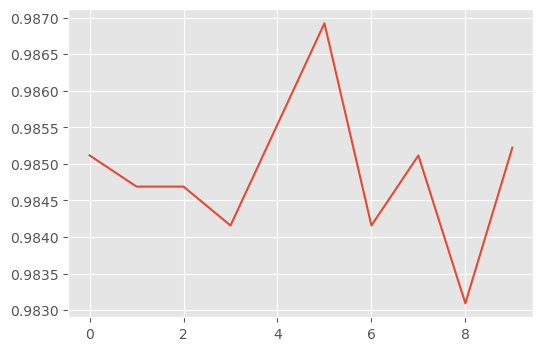

In [26]:
sns.lineplot(score);

In [27]:
score = cross_val_score(XGBClassifier(random_state=17), 
                        X_train, y_train, cv=skf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.4f}".format(score.mean())}')

Scores for each fold are: [0.98990006 0.99053695 0.99149389 0.99149389 0.99170654 0.99213184
 0.99096225 0.99117491 0.99011164 0.99064327]
Average score: 0.9910


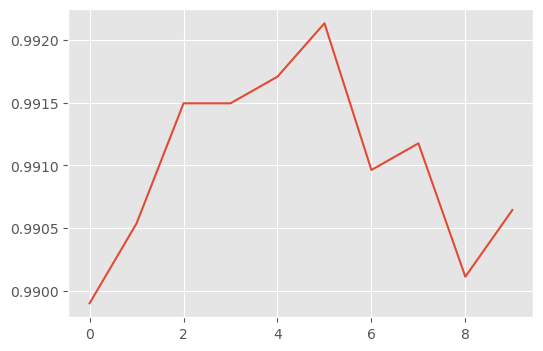

In [28]:
sns.lineplot(score);

In [29]:
score = cross_val_score(CatBoostClassifier(random_state=17, loss_function='Logloss', verbose=False), 
                        X_train, y_train, cv=skf)
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.4f}".format(score.mean())}')

Scores for each fold are: [0.99043164 0.9903243  0.99202552 0.99064327 0.99213184 0.99266348
 0.99117491 0.99138756 0.99064327 0.99043062]
Average score: 0.9912


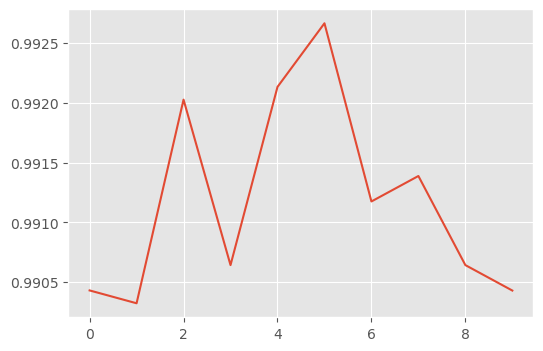

In [30]:
sns.lineplot(score);

In [31]:
score = cross_val_score(LogisticRegression(random_state=17, multi_class='ovr', max_iter=300), 
                        X_train, y_train, cv=skf)
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.4f}".format(score.mean())}')

Scores for each fold are: [0.98894323 0.98787879 0.99011164 0.98787879 0.98936736 0.99085593
 0.98904838 0.99000532 0.98862307 0.98979266]
Average score: 0.9893


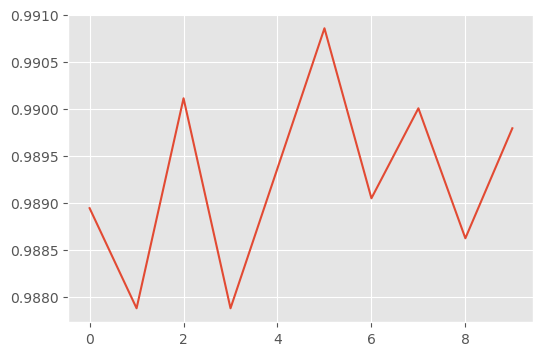

In [32]:
sns.lineplot(score);

In [33]:
# Implementing XGBC Solution with parameter tuning

# xgbc = XGBClassifier()
# parms = {'eval_metric': ['logloss'],\
#          'max_depth' : [2, 4],\
#          'max_leaves' : [0, 2],\
#          'booster' : ['gbtree'],\
#          'gamma' : [0, 1, 2],\
#          'tree_method' : ['gpu_hist']}

In [34]:
# Implementing LGBMC Solution with parameter tuning

# lgbc = LGBMClassifier()
# parms = loss_function = 'Logloss',
#         iterations = 1099,
#         learning_rate = 0.0389,
#         depth = 4,
#         random_strength = 4.76081,
#         bagging_temperature = 0.116419,
#         border_count = 143,
#         l2_leaf_reg = 7,
#         verbose = False, 
#         task_type = 'GPU'

In [35]:
# from sklearn.model_selection import GridSearchCV
# grid = GridSearchCV(xgbc, parms, verbose=0, cv=None, n_jobs=-1)

In [36]:
# print(grid.best_params_)

In [64]:
# Implementing Cat Boost with Native Grid Search

cbc = CatBoostClassifier(loss_function='Logloss', eval_metric='Logloss', task_type='GPU', od_type='Iter', verbose=False, random_seed=17)

grid = {'learning_rate' : [0.02, 0.03, 0.05],
        'iterations' : [8000, 10000, 14000],
        'l2_leaf_reg' : [2, 3, 5],
        'depth' : [2, 3, 4]}

In [65]:
grid_search_result = cbc.grid_search(param_grid=grid, cv=3, X=X_train, y=y_train, stratified=True, verbose=False, plot=False)

bestTest = 0.03199765227
bestIteration = 1312
bestTest = 0.03191659437
bestIteration = 1027
bestTest = 0.0321726818
bestIteration = 641
bestTest = 0.03200343749
bestIteration = 1256
bestTest = 0.03185235674
bestIteration = 1027
bestTest = 0.03219816855
bestIteration = 545
bestTest = 0.03200743166
bestIteration = 1255
bestTest = 0.03183683757
bestIteration = 1001
bestTest = 0.03215830475
bestIteration = 544
bestTest = 0.03199765227
bestIteration = 1312
bestTest = 0.03191659112
bestIteration = 1027
bestTest = 0.03217268505
bestIteration = 641
bestTest = 0.03200344073
bestIteration = 1256
bestTest = 0.03185235998
bestIteration = 1027
bestTest = 0.03219816855
bestIteration = 545
bestTest = 0.03200743166
bestIteration = 1255
bestTest = 0.03183683432
bestIteration = 1001
bestTest = 0.03215830475
bestIteration = 544
bestTest = 0.03199764578
bestIteration = 1312
bestTest = 0.03191659761
bestIteration = 1027
bestTest = 0.0321726818
bestIteration = 641
bestTest = 0.03200343424
bestIteration = 12

In [66]:
grid_search_result['params']

{'depth': 4, 'l2_leaf_reg': 2, 'iterations': 8000, 'learning_rate': 0.05}

In [67]:
print(cbc.get_all_params())

{'nan_mode': 'Min', 'gpu_ram_part': 0.95, 'eval_metric': 'Logloss', 'iterations': 8000, 'leaf_estimation_method': 'Newton', 'observations_to_bootstrap': 'TestOnly', 'od_pval': 0, 'grow_policy': 'SymmetricTree', 'penalties_coefficient': 1, 'boosting_type': 'Plain', 'feature_border_type': 'GreedyLogSum', 'bayesian_matrix_reg': 0.10000000149011612, 'devices': '-1', 'eval_fraction': 0, 'pinned_memory_bytes': '104857600', 'force_unit_auto_pair_weights': False, 'l2_leaf_reg': 2, 'random_strength': 1, 'od_type': 'Iter', 'rsm': 1, 'boost_from_average': False, 'gpu_cat_features_storage': 'GpuRam', 'fold_size_loss_normalization': False, 'model_size_reg': 0.5, 'pool_metainfo_options': {'tags': {}}, 'use_best_model': False, 'meta_l2_frequency': 0, 'od_wait': 20, 'class_names': [0, 1], 'random_seed': 17, 'depth': 4, 'border_count': 128, 'min_fold_size': 100, 'data_partition': 'DocParallel', 'bagging_temperature': 1, 'classes_count': 0, 'auto_class_weights': 'None', 'leaf_estimation_backtracking': '

In [68]:
cbc.fit(X_train, y_train)

In [69]:
from sklearn.metrics import classification_report

predictions_train = cbc.predict(X_train)
predictions_valid = cbc.predict(X_valid)

print(classification_report(y_train, predictions_train))
print(classification_report(y_valid, predictions_valid))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85277
           1       0.99      0.98      0.98      8774

    accuracy                           1.00     94051
   macro avg       1.00      0.99      0.99     94051
weighted avg       1.00      1.00      1.00     94051

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     21320
           1       0.96      0.93      0.95      2193

    accuracy                           0.99     23513
   macro avg       0.98      0.96      0.97     23513
weighted avg       0.99      0.99      0.99     23513



In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
ack_train = accuracy_score(y_train, predictions_train, normalize=True)
ack_valid = accuracy_score(y_valid, predictions_valid, normalize=True)

print('Training Accuracy: '+str(ack_train))
print('Validation Accuracy: '+str(ack_valid))
print('Train ROC_AUC: '+str(roc_auc_score(y_train, cbc.predict(X_train), multi_class='ovr')))
print('Validation ROC_AUC: '+str(roc_auc_score(y_valid, cbc.predict(X_valid), multi_class='ovr')))

Training Accuracy: 0.9969909942478017
Validation Accuracy: 0.990260706843023
Train ROC_AUC: 0.9871446975707818
Validation ROC_AUC: 0.9645611912027781


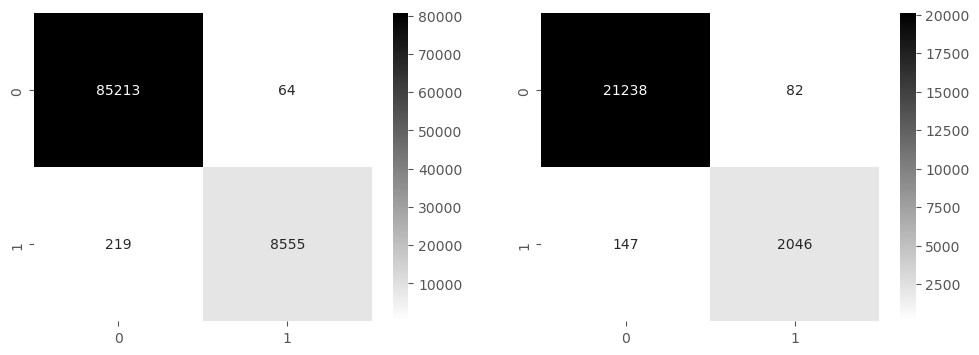

In [71]:
cf_train = confusion_matrix(y_train, predictions_train)
cf_valid = confusion_matrix(y_valid, predictions_valid)

fig, ax = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = (12,4)
sns.heatmap(cf_train, annot=True, fmt='g', robust=True, cmap = 'binary', ax=ax[0]);
sns.heatmap(cf_valid, annot=True, fmt='g', robust=True, cmap = 'binary', ax=ax[1]);
fig.show()

In [72]:
predictions = cbc.predict_proba(test[features])[:,-1]

In [73]:
submission = pd.DataFrame({'id': test.id, 'Class': predictions})

In [74]:
submission

id     Class
0      117564  0.000002
1      117565  0.003896
2      117566  0.000072
3      117567  0.047656
4      117568  0.000853
...       ...       ...
78372  195936  0.000038
78373  195937  0.000055
78374  195938  0.000125
78375  195939  0.131396
78376  195940  0.990349

[78377 rows x 2 columns]

In [75]:
submission.to_csv('submission.csv', index=False)